In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = cv2.imread('./beras5.jpg')
im=mpimg.imread('./beras5.jpg')

#convert image to rgb color for matplotlib
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#show image with matplotlib
plt.imshow(img)

terlihat diatas adalah proses segementasi dari mengubah citra menjadi RGB 

In [4]:
#convert image to grayscale
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#grayscale image represented as a 2-d array 
print(gray_img)

[[36 37 38 ... 47 48 47]
 [34 36 38 ... 48 49 48]
 [35 38 42 ... 50 51 49]
 ...
 [74 70 69 ... 61 61 61]
 [75 71 68 ... 61 61 60]
 [75 74 73 ... 55 61 63]]


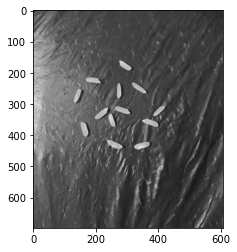

In [5]:
# have to convert grayscale back to RGB for plt.imshow()
img_grayscale= plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_GRAY2RGB))


gambar diatas hasil dari citra yang sudah di ubah kedalam grayscale 

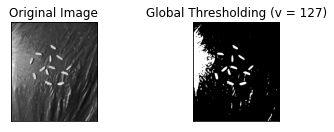

In [8]:
#ret, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
 
#cv2.imshow('Threshold', thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

img = cv2.imread('./beras5.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

titles = ['Original Image', 'Global Thresholding (v = 127)']
images = [img, th1]
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

setelah sudah menjadi citra grayscale kemudian di konversi ke citra threshold seperti diatas

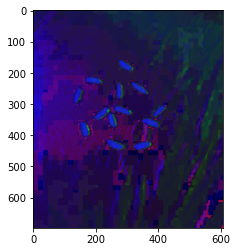

In [11]:
#memanggil file gambar
img = cv2.imread('./beras5.jpg')

#menampung nilai gambar yang sudah dikonversi ke hsv
image_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

plt.imshow(image_hsv)

#menampilkan gambar yang sudah di ubah ke hsv
#cv2.imshow("HSV",image_hsv)
#menampilkan gambar asli
#cv2.imshow("Gambar Asli",img)

#cv2.waitKey(0)
#cv2.desteroyAllWindows()

kemudian pada proses akuisisi nilai putih beras dilakukan analisa hsv,citra yang awal rgb diubah ke hsv untuk proses analisis,nilai hsv diambil sesuai dengan ambang batas sesuai standard,proses nya dilakukan dengan setiap butir beras sesuai koordinat objek segmentasi, Setelah seluruh objek dianalisis, dilakukan pelabelan nilai bersih atau tidak
bersih. Kemudian dihitung prosentase objek yang bernilai bersih.Jika jumlah bulir beras
yang bersih kurang dari 75% dari seluruh gambar beras, maka beras dikategorikan tidak
bersih

Proses akuisisi nilai putih beras, dilakukan dengan menganalisis nilai Hue untuk setiap
objek sesuai dengan koordinat masing-masing. Agar dapat dianalisis citra RGB
sebelumnya dikonversi menjadi citra HSV. Dari masing-masing objek, jika nilai
Saturation < 0.4 dan nilai Value > 0.55, maka objek diberi label “bersih”, jika tidak
maka diberi label “tidak”